<div align="center">
  <h1><strong>Machine Learning - Kelompok 6B</strong></h1>
  <table style="margin-top: 50px; margin-bottom: 30px; width: 80%; text-align: center;">
    <tr>
      <th>Nama Anggota</th>
      <th>NIM</th>
    </tr>
    <tr>
      <td>Muh. Naufal Fahri Salim</td>
      <td>H071231031</td>
    </tr>
    <tr>
      <td>Muh. Aipun Pratama</td>
      <td>H071231045</td>
    </tr>
  </table>
</div>

<br>

---

# 🎯 **Deteksi Komentar Bullying di Media Sosial**


Proyek ini bertujuan untuk menghasilkan sebuah model analisis sentimen yang dirancang untuk mendeteksi komentar di media sosial, khususnya untuk mengidentifikasi apakah sebuah komentar termasuk dalam kategori bullying atau non-bullying. Model machine learning yang diusulkan akan dikembangkan untuk mengidentifikasi dan mengklasifikasikan komentar di media sosial ke dalam dua kategori: **Bullying** dan **Non-Bullying**. Dengan menggunakan dataset yang telah diberi label dari komentar TikTok, model ini akan dilatih untuk mengenali pola, bahasa, dan konteks yang membedakan antara komentar yang merugikan dan yang tidak.

## 📚 **Latar Belakang Masalah**

Dengan pesatnya perkembangan platform media sosial seperti TikTok, komentar bullying menjadi masalah utama yang mempengaruhi kesehatan mental pengguna dan pengalaman mereka di platform. Mengidentifikasi komentar bullying secara manual tidak efektif karena volume komentar yang tinggi dan keragaman bahasa serta konteks. Media sosial memungkinkan pengguna untuk meninggalkan komentar yang bisa berisi pujian hingga kritik merugikan. Bahasa ambigu dan sarkasme sering digunakan dalam komentar bullying, sehingga diperlukan sistem otomatis yang dapat mendeteksi dan mengklasifikasikan komentar bullying secara akurat.

## 🚀 **Tujuan Analisis**

Tujuan dari analisis ini, yaitu pengembangan model machine learning untuk deteksi komentar bullying dari dataset komentar di TikTok, adalah sebagai berikut:

1.  **Deteksi Otomatis**: Mengidentifikasi komentar bullying secara otomatis untuk mengurangi dampak negatif pada kesehatan mental pengguna dan menciptakan lingkungan online yang lebih aman. 🔍

2.  **Deteksi yang Lebih Akurat**: Mengembangkan model yang dapat membedakan komentar bullying dari komentar non-bullying dengan akurat, menggunakan teknik machine learning dan analisis teks yang canggih. 🎯

3.  **Peningkatan Kesadaran**: Meningkatkan kesadaran tentang dampak bullying dan pentingnya moderasi konten yang efektif, untuk mengurangi cyberbullying di media sosial. 🌟

## 📊 **Gambaran Umum Dataset**

Dataset yang digunakan dalam proyek ini diperoleh melalui proses scraping data komentar di TikTok, menggunakan script dari repository GitHub [cubernetes/TikTokCommentScraper](https://github.com/cubernetes/TikTokCommentScraper). File utama yang digunakan dalam analisis ini adalah `train.csv`, yang berisi data komentar TikTok beserta label klasifikasinya. Berikut adalah deskripsi dari kolom-kolom yang ada dalam dataset tersebut:

  - **Text**: Kolom ini berisi teks dari komentar yang diambil dari video TikTok. Setiap entri adalah komentar unik dari pengguna TikTok.
  - **Label**: Kolom ini berisi label untuk setiap komentar yang menunjukkan apakah komentar tersebut termasuk dalam kategori **Bullying** atau **Non-Bullying**. Label ini berisi nilai biner:
      - **0**: Non-Bullying, menunjukkan bahwa komentar tersebut tidak mengandung bullying.
      - **1**: Bullying, menunjukkan bahwa komentar tersebut mengandung bullying.

<br>

---

## 📊 **Import Libraries**
Pada bagian ini, berbagai library diimpor untuk mendukung proses pemrosesan data, pengembangan, dan evaluasi model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from indoNLP.preprocessing import *
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import joblib

## 📂 **Load Data**

Pada bagian ini merupakan proses memuat dataset yang telah dikumpulkan untuk analisis. Dataset ini berisi komentar yang di-scrape dari TikTok dan disimpan dalam file CSV yang disimpan di github. Berikut adalah langkah-langkah untuk memuat dan menampilkan data:

In [3]:
import requests

# Unduh CSV mentah
url = 'https://github.com/nfahrisalim/TikTokCyberBullying/raw/main/tiktokscraped.csv'
response = requests.get(url)
lines = response.text.strip().split('\n')

cleaned_data = []

for line in lines:
    # Hilangkan newline, lalu pecah dari belakang untuk mencari label 0/1
    if line.endswith(',0') or line.endswith(',1'):
        label = line[-1]
        text = line[:-2]
        # Hapus koma yang tidak perlu dari text (tapi bukan yang sebelum label)
        text = text.replace(',', '')  # atau gunakan regex jika lebih presisi diperlukan
        cleaned_data.append([text.strip(), label])
    else:
        # Baris rusak: bisa di-skip atau ditangani khusus
        continue

# Simpan hasilnya ke CSV baru
import pandas as pd

df_cleaned = pd.DataFrame(cleaned_data, columns=['text', 'label'])
df_cleaned.to_csv('cleaned_tiktokscraped.csv', index=False)

print("CSV telah dibersihkan dan disimpan sebagai 'cleaned_tiktokscraped.csv'")


CSV telah dibersihkan dan disimpan sebagai 'cleaned_tiktokscraped.csv'


# 🔍 **Exploratory Data Analysis**

- **Distribusi Label**

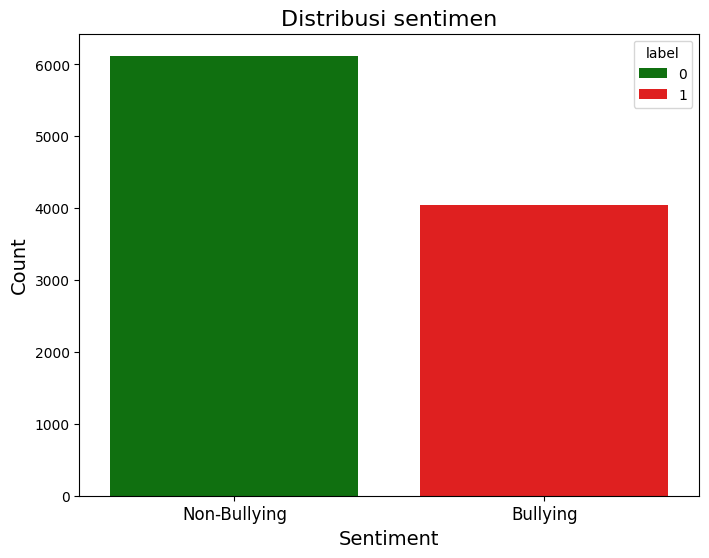

In [3]:
sentiment_counts = df['label'].value_counts().reset_index()
sentiment_counts.columns = ['label', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='Count', data=sentiment_counts, hue='label', dodge=False, palette=['green', 'red'])
plt.title('Distribusi sentimen', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Non-Bullying', 'Bullying'], fontsize=12)
plt.show()

Berdasarkan grafik distribusi sentimen, dataset ini menunjukkan **ketidakseimbangan data** dengan jumlah label **Non-Bullying yang lebih banyak** dibandingkan Bullying. Untuk mengatasi potensi bias model akibat ketidakseimbangan ini, diperlukan teknik *sampling*. Mengingat total data kami yang berjumlah sekitar **20.948 baris**, kami memilih metode **undersampling** untuk mengurangi sampel kelas mayoritas (Non-Bullying) agar lebih seimbang dengan kelas minoritas.

In [4]:
non_bullying = df[df['label'] == 0]
bullying = df[df['label'] == 1]

non_bullying_downsampled = resample(non_bullying,
                                    replace=False,
                                    n_samples=len(bullying),
                                    random_state=42)

df_x = pd.concat([non_bullying_downsampled, bullying])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_36088\3148306152.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_x, palette=['green', 'red'])


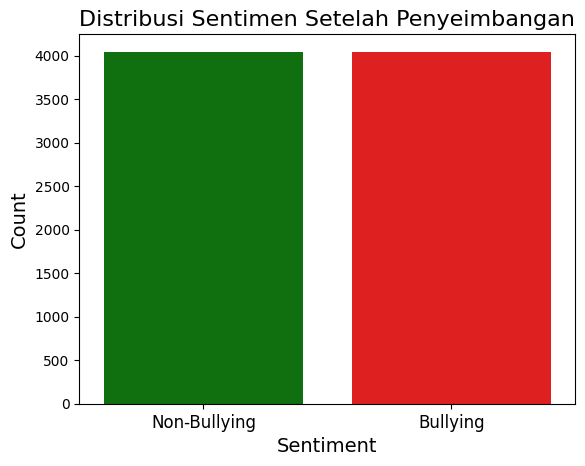

In [5]:
sns.countplot(x='label', data=df_x, palette=['green', 'red'])
plt.title('Distribusi Sentimen Setelah Penyeimbangan', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Non-Bullying', 'Bullying'], fontsize=12)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


- **Distribusi Jumlah kata**

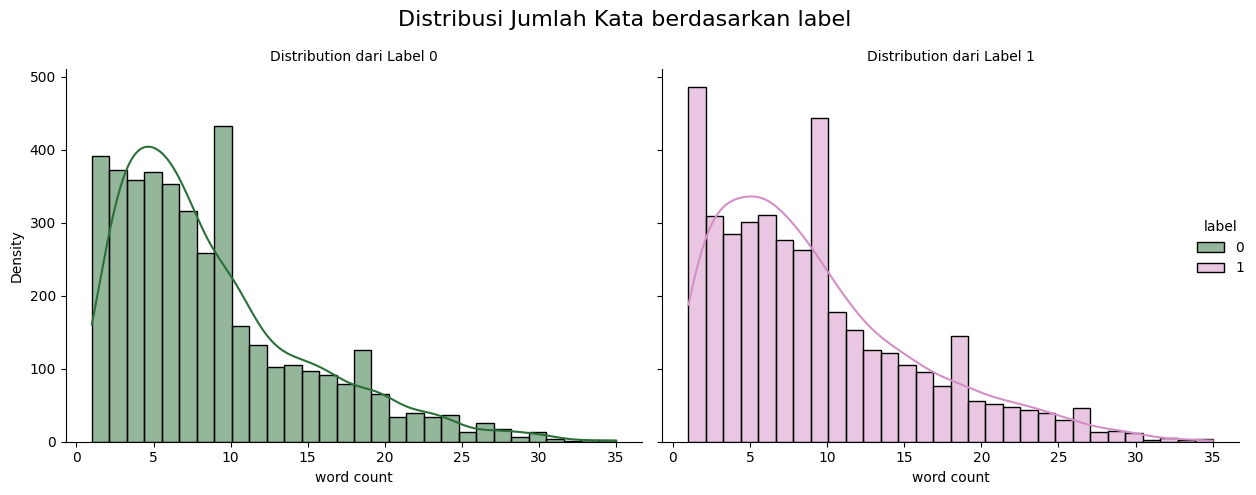

In [6]:
df_x['word_count'] = df_x['text'].apply(lambda x: len(x.split()))

g = sns.FacetGrid(df_x, col='label', hue='label', palette='cubehelix', height=5, aspect=1.2)
g.map(sns.histplot, 'word_count', kde=True, bins=30)

g.set_axis_labels("word count", "Density")
g.set_titles("Distribution dari Label {col_name}")
g.fig.suptitle("Distribusi Jumlah Kata berdasarkan label", fontsize=16)
g.add_legend()
plt.tight_layout()
plt.show()

Analisis visual distribusi panjang teks mengungkapkan adanya ketidakseimbangan, di mana label 0 (positif) cenderung memiliki lebih banyak teks dengan jumlah kata yang besar dibandingkan label 1 (bullying). Untuk mengatasi potensi bias dari perbedaan ini, kami menerapkan strategi sampling dengan mengambil sampel data bullying dan non-bullying yang memiliki distribusi panjang kata lebih sebanding. Proses ini dilanjutkan dengan melakukan *sampling lebih lanjut dari setiap 'bin'* (kelompok rentang panjang kata) untuk memastikan bahwa distribusi panjang teks antara kedua label menjadi sepenuhnya setara, sehingga analisis atau pemodelan selanjutnya tidak dipengaruhi oleh variasi panjang teks awal.

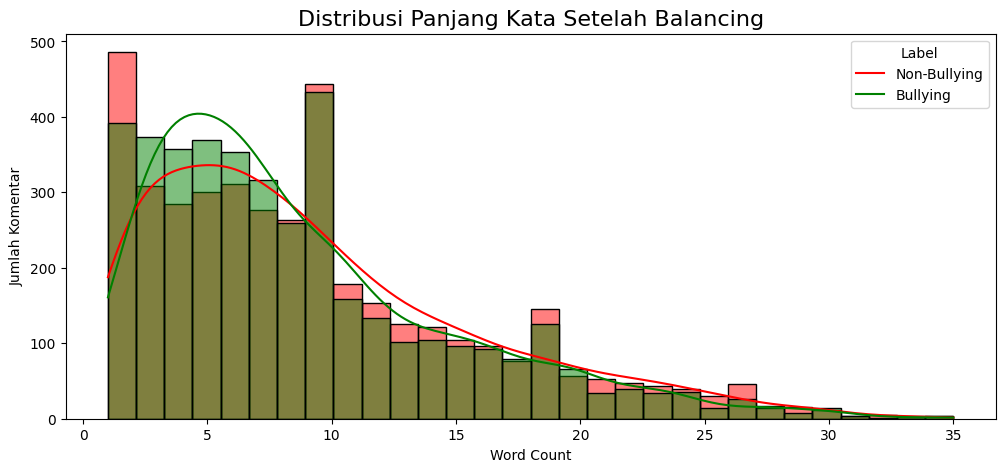

In [7]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df_x, x='word_count', hue='label', bins=30, palette=['green', 'red'], kde=True)
plt.title('Distribusi Panjang Kata Setelah Balancing', fontsize=16)
plt.xlabel('Word Count')
plt.ylabel('Jumlah Komentar')
plt.legend(title='Label', labels=['Non-Bullying', 'Bullying'])
plt.show()


- **Outlier Handling (Box Plot IQR Method)**

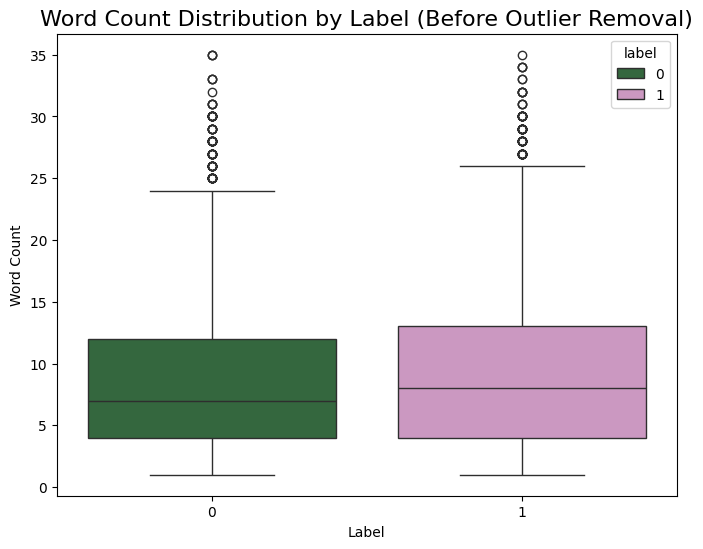

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='word_count', data=df_x, palette='cubehelix', hue='label')
plt.title('Word Count Distribution by Label (Before Outlier Removal)', fontsize=16)
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.show()

*Boxplot* menunjukkan bahwa panjang teks untuk kedua label memiliki distribusi yang serupa, dengan rentang interkuartil (IQR) yang hampir sama.
Meskipun terdapat beberapa *outlier* (teks dengan panjang yang sangat tinggi), hal ini wajar terjadi pada data teks. *Outlier* ini bisa merepresentasikan teks yang sangat informatif atau mungkin teks yang mengandung kata-kata berulang atau tidak relevan.

In [9]:
df_x

,text,label,word_count
2095,kita hargai orang udah minta maf kok air mata ...,0,12
3693,teh tariq akhirnya udh punya pasangan,0,6
1803,kalau ada yang belum paham tanya kak gem biar ...,0,11
4296,senyuma lu mirip logo Arsenal,0,5
2572,mending kaya aldi taher di upload ke youtube n...,0,24
...,...,...,...
10161,ini emang bisa jadi bukti sih kalau sdm di Ind...,1,22
10162,cowo yang ngejambak cewek kalo berantem piks b...,1,8
10163,owh aku gay?? 🥺🦶🏻,1,4
10164,"Pak Luhut Panjaitan: Aku Raja, Kau...""",1,6


Setelah melalui tahap EDA dan proses *sampling*, dimensi dataset kami berubah menjadi **13.676 baris × 4 kolom** dari ukuran awalnya **20.910 baris × 2 kolom**.

---

# 🧹 **Data Preprocessing**
Pada bagian ini merupakan preprocessing pada data untuk memastikan kualitas data yang optimal sebelum pelatihan model.

- **Handling duplicates**

Menghapus duplikasi dalam data adalah langkah krusial untuk memastikan bahwa model yang dilatih tidak bias dan akurat. Berikut adalah langkah-langkah untuk menangani duplikasi dalam dataset:

In [10]:
df_x.duplicated(subset=['text']).sum()

np.int64(115)

In [11]:
df_x.drop_duplicates(inplace=True, subset=['text'])

- **Handling Emojis**

Pada bagian ini, untuk menangani emoji dalam teks komentar. Emoji sering kali membawa makna tambahan yang perlu diubah menjadi format yang dapat diproses oleh model. Untuk itu, kita akan mengonversi emoji menjadi kata-kata yang setara.

In [12]:
#convert emoji to word

def convert_emoji(text) :
    return emoji_to_words(text, lang='id', use_alias=False, delimiter=(' ', ' '))

df_x['text'] = df_x['text'].apply(convert_emoji)


In [13]:
df_x

,text,label,word_count
2095,kita hargai orang udah minta maf kok air mata ...,0,12
3693,teh tariq akhirnya udh punya pasangan,0,6
1803,kalau ada yang belum paham tanya kak gem biar ...,0,11
4296,senyuma lu mirip logo Arsenal,0,5
2572,mending kaya aldi taher di upload ke youtube n...,0,24
...,...,...,...
10161,ini emang bisa jadi bukti sih kalau sdm di Ind...,1,22
10162,cowo yang ngejambak cewek kalo berantem piks b...,1,8
10163,owh aku gay?? wajah_memelas telapak_kaki_war...,1,4
10164,"Pak Luhut Panjaitan: Aku Raja, Kau...""",1,6


- **Cleaning Text by Removing Unecessary Elements**

Pada bagian ini, akan dibersihkan teks komentar dari elemen-elemen yang tidak perlu untuk meningkatkan kualitas data sebelum analisis lebih lanjut. Proses ini meliputi penghapusan simbol, emoji, URL, dan elemen lain yang dapat mengganggu analisis.

In [14]:
#Bersihin data ( remove simbol, emoji etc)
def clean_text(text):
    text = re.sub(r'http\S+', '', text) #remove url
    text = re.sub(r'@\S+', '', text) #remove mention
    text = re.sub(r'#\S+', '', text) #remove hashtag
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) #keep only alphanumeric
    text = re.sub(r'\s+', ' ', text).strip() #remove extra spaces
    text = re.sub(r'(.)\1+', r'\1', text) #remove duplicate characters

    return text

In [15]:
df_x['text'] = df_x['text'].apply(clean_text)
df_x['text'] = df_x['text'].str.lower()

- **Replacing Slang Words in The Text Data**

Langkah ini menggantikan kata-kata slang dalam teks komentar dengan bentuk yang lebih formal atau standar. Penggunaan bahasa slang dapat mempengaruhi pemahaman model, sehingga mengganti dengan istilah yang lebih umum membantu meningkatkan akurasi analisis.

In [16]:
df_x['text_cleaned'] = df_x['text'].apply(lambda x: replace_slang(x))

- **Remove Stop Words**

Tahap ini menghapus kata-kata yang tidak memiliki makna signifikan dalam analisis teks, seperti kata penghubung dan kata umum lainnya. Menghilangkan kata-kata tersebut membantu fokus pada kata-kata kunci yang lebih relevan dan meningkatkan kualitas pemodelan.

In [17]:
stop_words = StopWordRemoverFactory().get_stop_words()

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df_x['text_cleaned'] = df_x['text_cleaned'].apply(lambda x: stopword(x))


- **Tokenization and Stemming**

1. Tokenisasi Teks

Tokenisasi membagi teks menjadi unit-unit yang lebih kecil, yaitu kata-kata individual. Ini membantu dalam analisis teks dengan memungkinkan pemrosesan setiap kata secara terpisah.

In [18]:
#tokenize text_cleaned
def tokenize_text(text):
    return text.split()

df_x['text_cleaned'] = df_x['text_cleaned'].apply(tokenize_text)

2. Stemming Data

Stemming adalah proses mengubah kata-kata menjadi bentuk dasarnya untuk menyederhanakan analisis teks. Dengan melakukan stemming, variasi kata yang memiliki makna yang sama akan dikurangi menjadi bentuk dasar yang konsisten. Langkah ini penting untuk mengurangi kompleksitas data dan meningkatkan akurasi model.

In [19]:
#stemming data

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

df_x['text_cleaned'] = df_x['text_cleaned'].apply(lambda x: stemming(x))

In [20]:
df_x.sample(10)

,text,label,word_count,text_cleaned
6235,aku mencari air matanya wajah menangis keras w...,1,13,aku cari air mata wajah menang keras wajah men...
7372,gimana2 jgn komen jahat lah emg yg dia omongin...,1,15,gimana2 jangan komen jahat lah memang dia omon...
8897,nutupin kebod han dengan ngomong ingris wajah ...,1,11,tutup kebod han omong ingris wajah gembira ura...
9196,puas gw liat panji tak bersuara tertawa terbah...,1,9,puas gue lihat panji tak suara tertawa bahak b...
30,a kakel aku juga ada yg di kaist tapi s2,0,10,a kakel aku ada di kaist s2
243,anj,0,1,anjing
4660,seperti datok siti nurhaliza beb,0,5,datok siti nurhaliza beb
8757,negara gaji dia hanya utk main2,1,6,negara gaji hanya main
5626,le makan samyang yuk aku udh lama ga makan sam...,0,15,makan samyang yuk aku lama enggak makan samyan...
5091,gua aneh karna gua gila,0,6,gua aneh gua gila


- **Melihat Distribusi Jumlah Kata Setelah Pre-processing Teks**

Setelah processing teks, penting untuk menganalisis distribusi jumlah kata dalam data yang telah dibersihkan. Analisis ini membantu untuk memahami seberapa banyak informasi yang tersisa setelah teks dibersihkan dan diolah. Langkah pertama adalah menghitung jumlah kata dalam setiap entri teks yang telah dibersihkan serta visualisasinya.

In [21]:
df_x['cleaned word count'] = df_x['text_cleaned'].apply(lambda x: len(x.split()))

<Axes: xlabel='cleaned word count', ylabel='Count'>

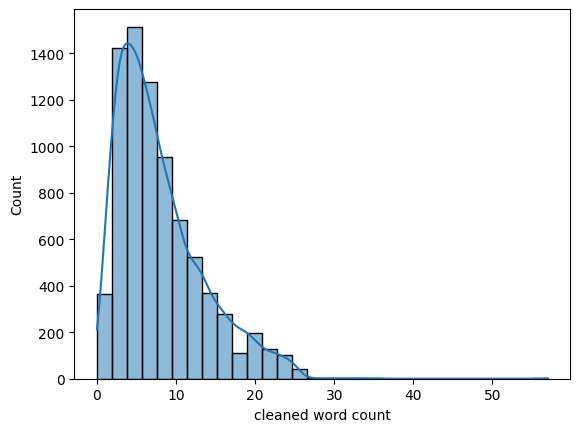

In [22]:
sns.histplot(df_x['cleaned word count'], kde=True, bins=30)

In [23]:
Q1 = df_x['cleaned word count'].quantile(0.25)
Q3 = df_x['cleaned word count'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_x[(df_x['cleaned word count'] < (Q1 - 1.5 * IQR)) | (df_x['cleaned word count'] > (Q3 + 1.5 * IQR))]
outliers['cleaned word count'].describe()

count    213.000000
mean      23.779343
std        2.936939
min       22.000000
25%       22.000000
50%       23.000000
75%       24.000000
max       57.000000
Name: cleaned word count, dtype: float64

In [24]:
df_x['cleaned word count'].describe()

count    7975.000000
mean        7.911975
std         5.438304
min         0.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        57.000000
Name: cleaned word count, dtype: float64

In [25]:
print('Jumlah teks dengan lebih dari 25 kata:', df_x[df_x['cleaned word count'] > 25].shape)
print('Jumlah teks dengan 0 kata:', df_x[df_x['cleaned word count'] == 0].shape)

Jumlah teks dengan lebih dari 25 kata: (10, 5)
Jumlah teks dengan 0 kata: (2, 5)


- **Menghapus Kalimat yang Memiliki 0 Kata atau Lebih dari 25 Kata**

Langkah berikutnya adalah menghapus kalimat yang memiliki jumlah kata nol atau lebih dari 25 kata. Hal ini dilakukan untuk menghilangkan entri yang tidak relevan dan memastikan kualitas dataset. Setelah penghapusan, distribusi jumlah kata pada dataset diperiksa kembali untuk memastikan bahwa data telah dinormalisasi. Ini juga **bertujuan untuk meningkatkan konsistensi dan mengurangi *noise* pada data yang akan digunakan untuk pemodelan.**

In [26]:
df_x = df_x[(df_x['cleaned word count'] > 0) & (df_x['cleaned word count'] <= 25)]

<Axes: xlabel='cleaned word count', ylabel='Count'>

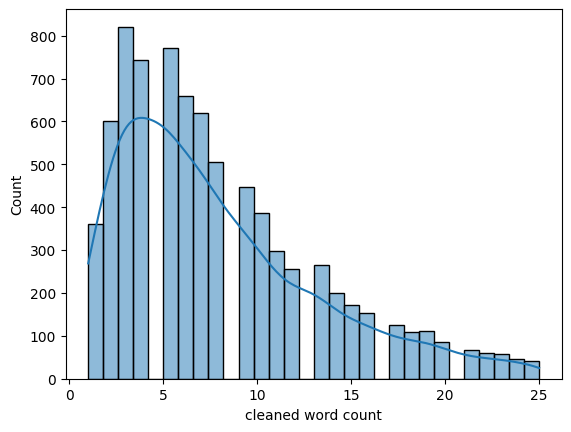

In [27]:
sns.histplot(df_x['cleaned word count'], kde=True, bins=30)

# 🔍 **Membuat 3 Model *Supervised Learning***

Langkah ini melibatkan pembuatan dan pelatihan model *machine learning* untuk mengklasifikasikan komentar sebagai *bullying* atau *non-bullying*. Berikut merupakan 3 model *Supervised Learning* yang akan kita gunakan:
1.  *Support Vector Machine* (SVM)
2.  *Naive Bayes* (*Multinomial Naive Bayes*)
3.  *Logistic Regression*

- **Splitting Dataset Menjadi Data Latih dan Data Uji (80:20)**

Langkah ini bertujuan untuk membagi dataset menjadi dua bagian: satu untuk melatih model dan satu lagi untuk menguji kinerjanya. Dataset dibagi menjadi data pelatihan (`X_train`, `y_train`) yang digunakan untuk melatih model, dan data pengujian (`X_test`, `y_test`) untuk mengevaluasi kinerja model setelah pelatihan. Pembagian ini memastikan bahwa model dapat diuji pada data yang belum pernah dilihat sebelumnya, memberikan indikasi yang lebih akurat tentang kinerjanya di dunia nyata.

In [28]:
X = df_x['text_cleaned']
y = df_x['label']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

- **Ekstraksi Fitur untuk Model *Supervised Learning* (TF-IDF *Vectorizer*)**

Pada tahap ini, fitur dari data teks diubah menjadi format numerik yang dapat digunakan oleh model *machine learning*. Proses ini dilakukan dengan menggunakan `TfidfVectorizer`, yang mengonversi teks menjadi representasi TF-IDF (*Term Frequency-Inverse Document Frequency*). Ini membantu dalam menilai pentingnya kata-kata dalam dokumen relatif terhadap seluruh dataset.

In [29]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

- **Pelatihan dan Evaluasi Model**

3 Model *machine learning* dilatih menggunakan data pelatihan dan dievaluasi menggunakan data pengujian. Model yang diterapkan adalah *Logistic Regression*, SVM, dan *Naive Bayes*. Evaluasi dilakukan dengan menghitung akurasi, *classification report*, skor ROC-AUC, dan *confusion matrix* dari model untuk menilai kinerjanya.

In [30]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bullying', 'Bullying'],
                yticklabels=['Non-Bullying', 'Bullying'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

In [31]:
df_x

,text,label,word_count,text_cleaned,cleaned word count
2095,kita hargai orang udah minta maf kok air mata ...,0,12,harga orang minta maf kok air mata keluar tidak,9
3693,teh tariq akhirnya udh punya pasangan,0,6,teh tariq akhir punya pasang,5
1803,kalau ada yang belum paham tanya kak gem biar ...,0,11,kalau yang paham tanya kak gem biar kasih paham,9
4296,senyuma lu mirip logo arsenal,0,5,senyuma lu mirip logo arsenal,5
2572,mending kaya aldi taher di upload ke youtube n...,0,24,mending kayak aldi taher upload youtube nya lu...,20
...,...,...,...,...,...
10161,ini emang bisa jadi bukti sih kalau sdm di ind...,1,22,memang jadi bukti sih kalau sdm indonesia rend...,13
10162,cowo yang ngejambak cewek kalo berantem piks b...,1,8,cowok ngejambak cewek kalo antem piks banget w...,10
10163,owh aku gay wajah memelas telapak kaki warna k...,1,4,aku gay wajah memelas telapak kaki warna kulit...,9
10164,pak luhut panjaitan aku raja kau,1,6,pak luhut panjaitan aku raja kau,6


Logistic Regression Accuracy Score Training -> 85.84%
Logistic Regression Accuracy Score Testing -> 73.38%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       809
           1       0.74      0.72      0.73       784

    accuracy                           0.73      1593
   macro avg       0.73      0.73      0.73      1593
weighted avg       0.73      0.73      0.73      1593

Logistic Regression ROC AUC Score -> 0.7336

Logistic Regression Confusion Matrix:


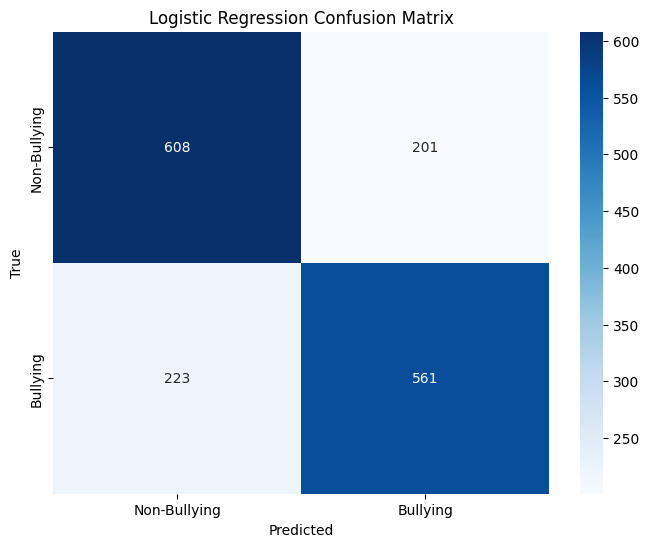

--------------------------------------------------
SVM Accuracy Score Training -> 96.31%
SVM Accuracy Score Testing -> 74.20%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       809
           1       0.74      0.73      0.74       784

    accuracy                           0.74      1593
   macro avg       0.74      0.74      0.74      1593
weighted avg       0.74      0.74      0.74      1593

SVM ROC AUC Score -> 0.7419

SVM Confusion Matrix:


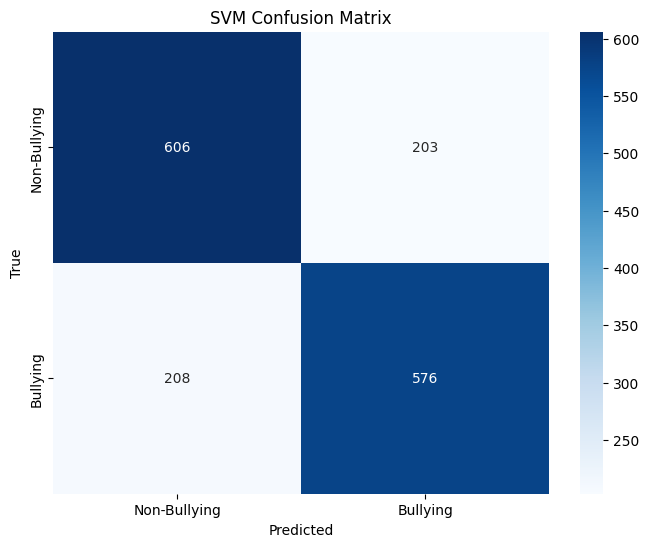

--------------------------------------------------
Naive Bayes Accuracy Score Training -> 87.16%
Naive Bayes Accuracy Score Testing -> 72.44%
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       809
           1       0.70      0.76      0.73       784

    accuracy                           0.72      1593
   macro avg       0.73      0.72      0.72      1593
weighted avg       0.73      0.72      0.72      1593

Naive Bayes ROC AUC Score -> 0.7250

Naive Bayes Confusion Matrix:


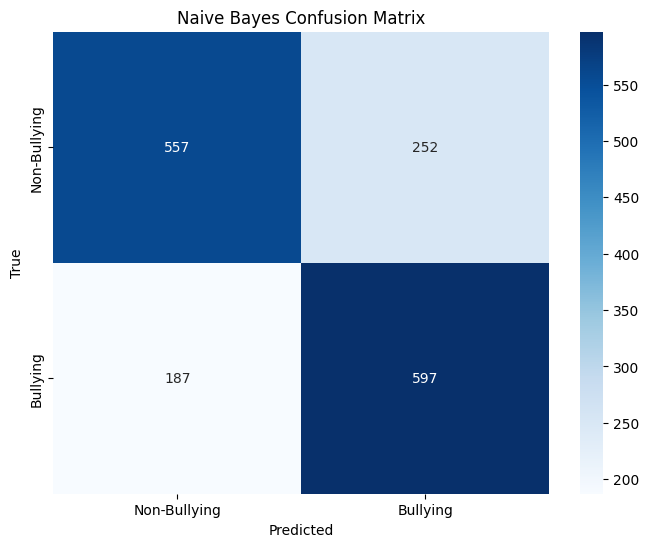

--------------------------------------------------


In [32]:
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)

    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, predictions_train) * 100
    test_accuracy = accuracy_score(y_test, predictions_test) * 100

    print(f"{model_name} Accuracy Score Training -> {train_accuracy:.2f}%")
    print(f"{model_name} Accuracy Score Testing -> {test_accuracy:.2f}%")

    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, predictions_test))

    roc_auc = roc_auc_score(y_test, predictions_test)
    print(f"{model_name} ROC AUC Score -> {roc_auc:.4f}\n")

    print(f"{model_name} Confusion Matrix:")
    plot_confusion_matrix(y_test, predictions_test, model_name)

    print('-' * 50)
    return model

# Existing models
logistic_regression = train_and_evaluate_model(LogisticRegression(), 'Logistic Regression')
svm = train_and_evaluate_model(SVC(), 'SVM')
naive_bayes = train_and_evaluate_model(MultinomialNB(), 'Naive Bayes')

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 200, 300, 400],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2']
}

grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, n_jobs=-1, scoring='roc_auc', verbose= 1)
grid_search_logistic.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_logistic.best_params_}")
print(f"Best Score: {grid_search_logistic.best_score_}")

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.790989769992167


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packa

Best Logistic Regression (GridSearch) Accuracy Score Training -> 85.78%
Best Logistic Regression (GridSearch) Accuracy Score Testing -> 73.51%
Best Logistic Regression (GridSearch) Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       809
           1       0.74      0.72      0.73       784

    accuracy                           0.74      1593
   macro avg       0.74      0.73      0.73      1593
weighted avg       0.74      0.74      0.73      1593

Best Logistic Regression (GridSearch) ROC AUC Score -> 0.7348

Best Logistic Regression (GridSearch) Confusion Matrix:


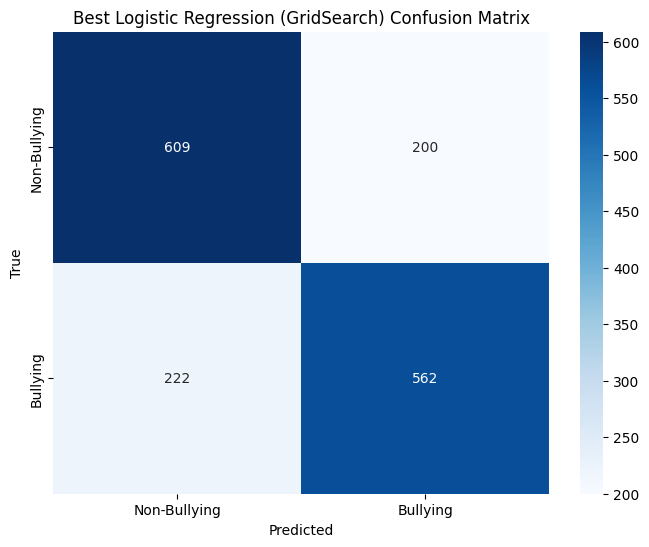

--------------------------------------------------


In [34]:
best_logistic_regression = grid_search_logistic.best_estimator_
best_logistic_regression = train_and_evaluate_model(best_logistic_regression, 'Best Logistic Regression (GridSearch)')

In [35]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # hanya digunakan untuk 'poly'
    'gamma': ['scale', 'auto'],  # digunakan di 'rbf', 'poly', 'sigmoid'
    'coef0': [0.0, 0.1, 0.5],  # digunakan di 'poly', 'sigmoid'
}

grid_search_svm = GridSearchCV(
    SVC(probability=True),
    param_grid=param_grid_svm,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1
)

grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0.0, 0.1, 0.5],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='roc_auc', verbose=1)

Best Parameters: {'C': 1, 'coef0': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Best Score: 0.7944
Best SVM (GridSearch) Accuracy Score Training -> 97.83%
Best SVM (GridSearch) Accuracy Score Testing -> 73.76%
Best SVM (GridSearch) Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       809
           1       0.74      0.72      0.73       784

    accuracy                           0.74      1593
   macro avg       0.74      0.74      0.74      1593
weighted avg       0.74      0.74      0.74      1593

Best SVM (GridSearch) ROC AUC Score -> 0.7374

Best SVM (GridSearch) Confusion Matrix:


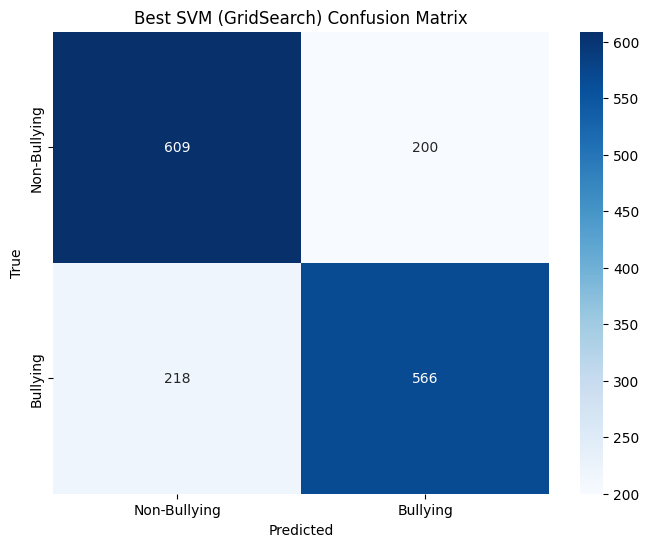

--------------------------------------------------


In [36]:
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Best Score: {grid_search_svm.best_score_:.4f}")

# Evaluasi model terbaik
best_svm = grid_search_svm.best_estimator_
best_svm = train_and_evaluate_model(best_svm, 'Best SVM (GridSearch)')

In [37]:
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

grid_search_nb = GridSearchCV(
    MultinomialNB(),
    param_grid=param_grid_nb,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1
)

grid_search_nb.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}, scoring='roc_auc',
             verbose=1)

Best Parameters: {'alpha': 0.5}
Best Score: 0.8018
Best Multinomial Naive Bayes (GridSearch) Accuracy Score Training -> 89.07%
Best Multinomial Naive Bayes (GridSearch) Accuracy Score Testing -> 72.19%
Best Multinomial Naive Bayes (GridSearch) Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.72       809
           1       0.70      0.75      0.73       784

    accuracy                           0.72      1593
   macro avg       0.72      0.72      0.72      1593
weighted avg       0.72      0.72      0.72      1593

Best Multinomial Naive Bayes (GridSearch) ROC AUC Score -> 0.7223

Best Multinomial Naive Bayes (GridSearch) Confusion Matrix:


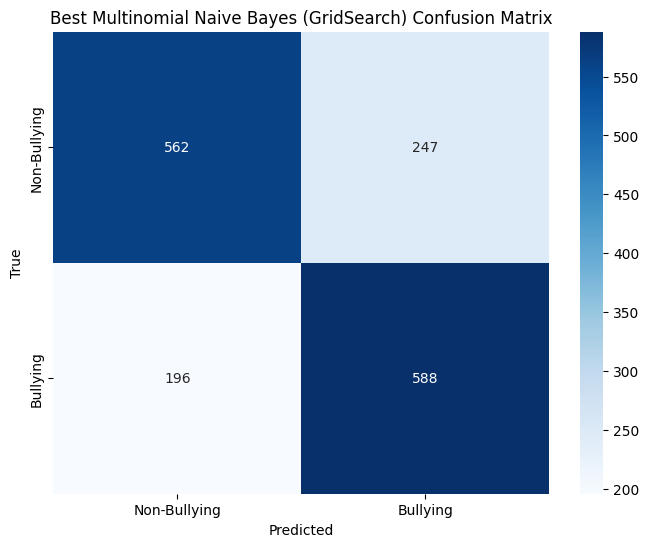

--------------------------------------------------


In [38]:
print(f"Best Parameters: {grid_search_nb.best_params_}")
print(f"Best Score: {grid_search_nb.best_score_:.4f}")

best_multinomial_nb = grid_search_nb.best_estimator_
best_multinomial_nb = train_and_evaluate_model(best_multinomial_nb, 'Best Multinomial Naive Bayes (GridSearch)')


In [ ]:
def predict_hate_speech(text, model, model_name):
    basetext = text
    text = convert_emoji(text)
    text = clean_text(text)
    text = text.lower()
    text = replace_slang(text)
    text = stopword(text)
    text = tokenize_text(text)
    text = stemming(text)
    text = vectorizer.transform([text])

    prediction = model.predict(text)
    result = 'Bullying' if prediction == 1 else 'Non Bullying'
    return f'{model_name} Prediction: {result}'

text = input('Enter text: ')
print("Prediksi yang benar adalah Bullying!")

print(predict_hate_speech(text, logistic_regression, 'Logistic Regression'))
print(predict_hate_speech(text, svm, 'SVM'))
print(predict_hate_speech(text, naive_bayes, 'Naive Bayes'))

In [ ]:
df_x

,text,label,word_count,text_cleaned,cleaned word count
2095,kita hargai orang udah minta maf kok air mata ...,0,12,harga orang minta maf kok air mata keluar tidak,9
3693,teh tariq akhirnya udh punya pasangan,0,6,teh tariq akhir punya pasang,5
1803,kalau ada yang belum paham tanya kak gem biar ...,0,11,kalau yang paham tanya kak gem biar kasih paham,9
4296,senyuma lu mirip logo arsenal,0,5,senyuma lu mirip logo arsenal,5
2572,mending kaya aldi taher di upload ke youtube n...,0,24,mending kayak aldi taher upload youtube nya lu...,20
...,...,...,...,...,...
10161,ini emang bisa jadi bukti sih kalau sdm di ind...,1,22,memang jadi bukti sih kalau sdm indonesia rend...,13
10162,cowo yang ngejambak cewek kalo berantem piks b...,1,8,cowok ngejambak cewek kalo antem piks banget w...,10
10163,owh aku gay wajah memelas telapak kaki warna k...,1,4,aku gay wajah memelas telapak kaki warna kulit...,9
10164,pak luhut panjaitan aku raja kau,1,6,pak luhut panjaitan aku raja kau,6


In [ ]:
!pip install fasttext

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
Failed to build fasttext


  error: subprocess-exited-with-error
  
  × Building wheel for fasttext (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      C:\Users\ASUS\AppData\Local\Temp\pip-build-env-vrwrwpu0\overlay\Lib\site-packages\setuptools\dist.py:599: SetuptoolsDeprecationWarning: Invalid dash-separated key 'description-file' in 'metadata' (setup.cfg), please use the underscore name 'description_file' instead.
      !!
      
              ********************************************************************************
              Usage of dash-separated 'description-file' will not be supported in future
              versions. Please use the underscore name 'description_file' instead.
              (Affected: fasttext).
      
              By 2026-Mar-03, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://setuptools.pypa.io/en/latest/userguide/declarative_config.h

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz

'wget' is not recognized as an internal or external command,
operable program or batch file.
'gunzip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
pip install fasttext-wheel

  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)

   ---------------------------------------- 0/2 [pybind11]
   ---------------------------------------- 2/2 [fasttext-wheel]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import fasttext
ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
sentence = df_x['text_cleaned'].apply(lambda x: x.split())

# Load the FastText model
ft = fasttext.load_model('cc.en.300.bin')

# Function to get the word embedding
def get_word_embedding(text):
    text_embedding = []
    for word in text:
        try:
            text_embedding.append(ft.get_word_vector(word))
        except:
            pass
    return text_embedding

sentence_embedding = sentence.apply(lambda x: get_word_embedding(x))

# Pad the sentence embedding
max_len = 50
padded_embeddings = pad_sequences(sentence_embedding, maxlen=max_len, dtype='float32', padding='post')

# For binary classification, use the labels directly
y = df_x['label'].values

# Train-test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(padded_embeddings, y, test_size=0.2, random_state=42)

Epoch 1/25


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4986 - loss: 0.6937 - val_accuracy: 0.5432 - val_loss: 0.6891
Epoch 2/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5596 - loss: 0.6835 - val_accuracy: 0.5228 - val_loss: 0.6910
Epoch 3/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5326 - loss: 0.6871 - val_accuracy: 0.5385 - val_loss: 0.6838
Epoch 4/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5451 - loss: 0.6851 - val_accuracy: 0.5636 - val_loss: 0.6721
Epoch 5/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5618 - loss: 0.6800 - val_accuracy: 0.4867 - val_loss: 0.6942
Epoch 6/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4937 - loss: 0.6976 - val_accuracy: 0.4882 - val_loss: 0.6930
Epoch 7/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5066 - loss: 0.6940 - val_accuracy: 0.4882 - val_loss: 0.6934
Epoch 8/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5086 - loss: 0.6929 - val_accuracy: 0.488

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

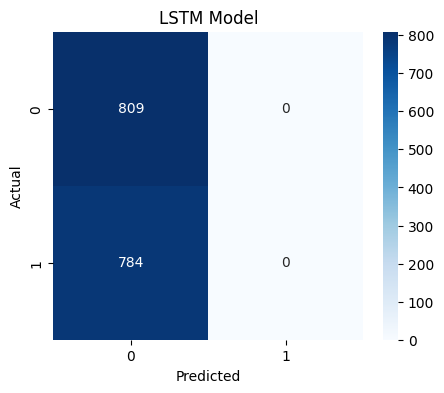

In [ ]:
# Build the LSTM model for binary classification
lstm = Sequential()
lstm.add(LSTM(units=128, return_sequences=True, input_shape=(max_len, 300)))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=64))
lstm.add(Dropout(0.2))
lstm.add(Dense(units=1, activation='sigmoid'))  # Single output for binary classification

# Compile the model
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions_test = model.predict(X_test)
    predictions_test_labels = (predictions_test > 0.5).astype(int).flatten()
    
    test_accuracy = accuracy_score(y_test, predictions_test_labels) * 100
    print(f"Test Accuracy Score -> {test_accuracy:.2f}%")
    
    print("LSTM Model Classification Report:")
    print(classification_report(y_test, predictions_test_labels))

    roc_auc = roc_auc_score(y_test, predictions_test)
    print(f"LSTM Model ROC AUC Score -> {roc_auc:.4f}\n")
    
    print("LSTM Model Confusion Matrix:")
    plot_confusion_matrix(y_test, predictions_test_labels, 'LSTM Model')

evaluate_model(lstm, X_test, y_test)